In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df_control = pd.read_csv("outputs/df_controlled_37.csv"  , parse_dates = ["DateTimeUTC"]).rename(columns={"puvoltsabs": "c_puvoltsabs", "soc": "c_soc"})
df_uncontrol=pd.read_csv("outputs/df_uncontrolled_37.csv", parse_dates = ["DateTimeUTC"]).rename(columns={"puvoltsabs": "u_puvoltsabs", "soc": "u_soc"})

display(df_control.info())
display(df_control.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DateTimeUTC   173 non-null    datetime64[ns]
 1   c_puvoltsabs  173 non-null    float64       
 2   c_soc         173 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 4.2 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DateTimeUTC   173 non-null    datetime64[ns]
 1   c_puvoltsabs  173 non-null    float64       
 2   c_soc         173 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 4.2 KB


None

In [12]:
print("Left: ", len(df_control))
print("Right: ", len(df_uncontrol))

df_expm = pd.merge(df_control, df_uncontrol, on=["DateTimeUTC"], how="inner")
print("Result: ", len(df_expm))

Left:  173
Right:  173
Result:  173


In [22]:
df_expm.describe()

,c_puvoltsabs,c_soc,u_puvoltsabs,u_soc
count,173.000000,173.000000,173.000000,173.0
mean,1.017058,317.216347,1.018248,0.0
std,0.003828,528.770191,0.004238,0.0
min,1.006925,0.000000,1.006925,0.0
25%,1.014463,0.000000,1.015570,0.0
50%,1.017075,0.000000,1.018524,0.0
75%,1.019259,207.262360,1.021275,0.0
max,1.027467,1819.988403,1.027978,0.0


Text(0.5, 0, 'Date')

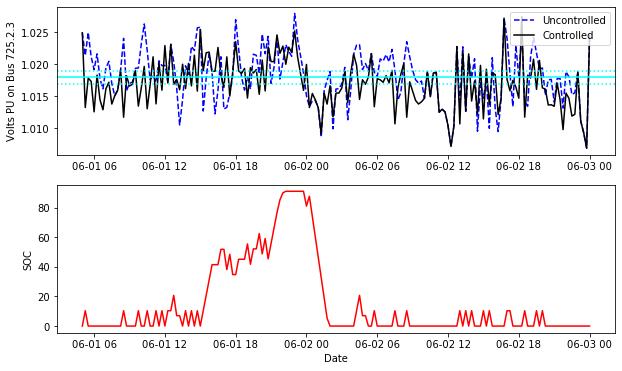

In [25]:
fig1 = plt.figure(figsize=(10,6))
ax1 = fig1.add_subplot(2,1,1)
ax2 = fig1.add_subplot(2,1,2)
set_point = 1.018
epsilon = 0.001


ax1.plot(df_expm["DateTimeUTC"].to_numpy(), df_expm["u_puvoltsabs"].to_numpy(), ls = '--', c = "blue", label = "Uncontrolled")
ax1.plot(df_expm["DateTimeUTC"].to_numpy(), df_expm["c_puvoltsabs"].to_numpy(), c = "black", label = "Controlled")
ax1.axhline(y=set_point, color="cyan")
ax1.axhline(y=set_point+epsilon, ls = ':', color="cyan")
ax1.axhline(y=set_point-epsilon, ls = ':', color="cyan")
ax1.legend(loc = 'upper right')
ax1.set_ylabel("Volts PU on Bus 725.2.3")

ax2.plot(df_expm["DateTimeUTC"].to_numpy(), df_expm["c_soc"].to_numpy()/2000*100, c = "red")
ax2.set_ylabel("SOC")
ax2.set_xlabel("Date")
#ax2.set_xticklabels(ax2.get_xticklabels(), rotation = -30, ha = 'left');